### Q1 Simulation in Sociology

In [17]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
#data= sts.norms.rvs(means, std, size)

In [23]:
def inc_sim(profile):

    #set random seed
    np.random.seed(333)

    #create a matrix of lognormally distributed errors, all of the same dimension as number of years* number of simulations
    errors = np.random.lognormal(0, p['stddev'] ,(p['lf_years'], p['num_draws']))
    
    #define the initial term
    base= np.log(p['inc'])
    
    #create an initial matrix of dim (lf_years, num_draws) (same as that of errors)
    ln_inc_mat = np.zeros((p['lf_years'], p['num_draws']))

    #fill the first row of the matrix with simulations for the first year
    ln_inc_mat[0, :] = base + errors[0, :]

    #loop and apply model to the remaining rows
    for t in range(1, p['lf_years']):
        ln_inc_mat[t, :] = (1-p['rho'])*(base+ (p['g']*t)+p['rho']*ln_inc_mat[t - 1, :]+errors[t, : ]

    
    return ln_inc_mat



In [24]:
p = {   'inc'         : 80000,      #starting income
        'stddev'      : 0.13,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    

In [29]:
ln_inc_mat=inc_sim(p)
print(ln_inc_mat)

[[ 12.53989493  12.33289556  12.22995561 ...  12.20935708  12.64102122
   12.36883419]
 [-17.55918202 -17.59897597 -17.59639085 ... -17.47300286 -17.26675032
  -17.55863977]
 [-29.24383068 -29.30118959 -29.76957467 ... -29.58390857 -29.58489666
  -29.57088997]
 ...
 [-36.72385558 -36.67261523 -36.76959069 ... -36.59959415 -36.47552469
  -36.47417781]
 [-36.73305694 -36.79755537 -36.6821253  ... -36.63412224 -36.47388555
  -36.48231989]
 [-36.46762166 -36.71648523 -36.73862232 ... -36.84495024 -36.5329815
  -36.62646035]]


In [30]:
ln_inc_mat[:, 0]

array([ 12.53989493, -17.55918202, -29.24383068, -34.18344489,
       -36.02803425, -37.09081387, -37.23265371, -37.44733057,
       -37.33863088, -37.15229314, -37.18581782, -37.32211984,
       -37.24096396, -37.34376054, -37.06670613, -37.09366899,
       -37.07933049, -36.90004871, -37.00621118, -37.06453086,
       -36.731435  , -37.02305018, -37.13926806, -37.07367396,
       -36.93803367, -37.04601599, -36.93560066, -37.05202628,
       -36.85222217, -36.79067755, -36.84379027, -36.88008748,
       -36.90373947, -36.87782334, -36.76079334, -36.70268619,
       -36.84291218, -36.72385558, -36.73305694, -36.46762166])

In [ ]:
ln_inc_mat

Text(0.5,1,'Number of Respondents in Wealth Bins')

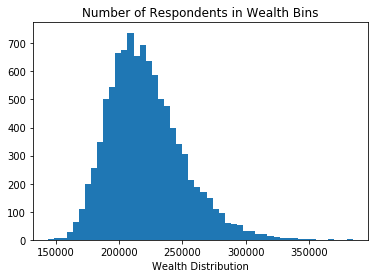

In [32]:
plt.hist(np.exp(ln_inc_mat[0,:]), bins=50)
plt.xlabel("Wealth Distribution")
plt.title("Number of Respondents in Wealth Bins")

### Part d) Changes in Initial Income and Variability

In [ ]:
p_new = {'inc'         : 80000,      #starting income
        'stddev'      : 0.17,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    